In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

    

In [6]:
dataset=pd.read_csv('Customers.csv')

In [7]:
dataset.head()

,CustomerID,Gender,Age,AnnualSalary(k$),Spendings(1-100)
0,157,Male,37,78,1
1,159,Male,34,78,1
2,201,Female,19,137,1
3,9,Male,64,19,3
4,202,Female,19,137,3


In [9]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,250.0,125.500,72.312977,1.0,63.25,125.5,187.75,250.0
Age,250.0,39.688,14.716554,18.0,28.00,36.5,50.00,70.0
AnnualSalary(k$),250.0,61.232,28.373480,15.0,40.00,61.5,78.00,137.0
Spendings(1-100),250.0,50.268,27.109553,1.0,31.25,50.0,73.00,99.0


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
CustomerID          250 non-null int64
Gender              250 non-null object
Age                 250 non-null int64
AnnualSalary(k$)    250 non-null int64
Spendings(1-100)    250 non-null int64
dtypes: int64(4), object(1)
memory usage: 9.9+ KB


In [11]:
dataset.isna().any()

CustomerID          False
Gender              False
Age                 False
AnnualSalary(k$)    False
Spendings(1-100)    False
dtype: bool

In [53]:
X=dataset.iloc[:,3:5].values


Text(0, 0.5, 'Euclidean distance')

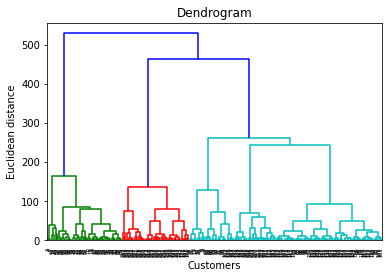

In [54]:
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')


The ward method of dendrogram is used to minimise the variance.


Choose the longest vertical line in the dendrogram such that no extended horizontal lines cross it.

As the color of dendrograms are three, it will be a good assumption to consider three as our optimum clusters.

In [55]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering (n_clusters=3, affinity='euclidean',linkage='ward')

In [56]:
y_hc=hc.fit_predict(X)

In [57]:
cluster_df=pd.DataFrame(y_hc)

In [58]:
cluster_df.rename(columns={0:'Cluster number'},inplace=True)

In [29]:
cluster_df.head()

,Cluster number
0,1
1,1
2,1
3,0
4,1


In [60]:
dataset['Clusteer']=cluster_df

In [61]:
dataset.rename(columns={'Clusteer':'Cluster number'},inplace=True)

In [62]:
dataset.head()

,CustomerID,Gender,Age,AnnualSalary(k$),Spendings(1-100),Cluster number,Cluster number
0,157,Male,37,78,1,1,1
1,159,Male,34,78,1,1,1
2,201,Female,19,137,1,1,1
3,9,Male,64,19,3,0,0
4,202,Female,19,137,3,1,1


Text(0, 0.5, 'Spending')

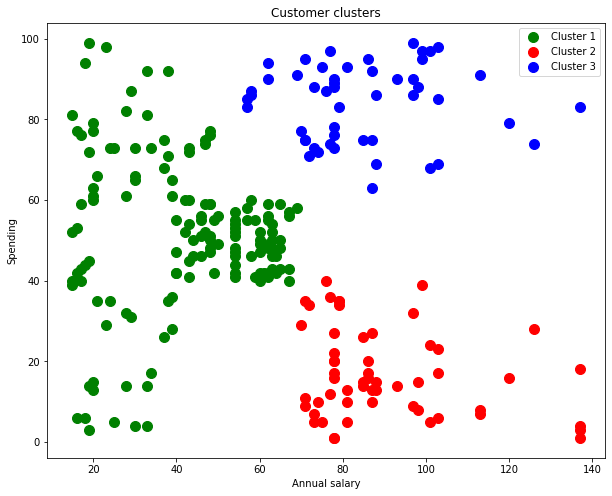

In [68]:
plt.figure(figsize=(10,8))
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=100, c='green',label='Cluster 1')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=100,c='red',label='Cluster 2')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=100,c='blue',label='Cluster 3')
plt.title('Customer clusters')
plt.legend()
plt.xlabel('Annual salary')
plt.ylabel('Spending')